In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('/Users/scipyguru/Library/Mobile Documents/com~apple~CloudDocs/Documents_New/NY fairness/NeurIPS/ZNO-Dataset/notebooks/school_level/eie_full_dataset.csv')

/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_73915/3946621196.py:1: DtypeWarning: Columns (74,75,77,78,79,80,88,89,91,92,93,94,95,96,98,99,100,101,105,106,120,121,129) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/scipyguru/Library/Mobile Documents/com~apple~CloudDocs/Documents_New/NY fairness/NeurIPS/ZNO-Dataset/notebooks/school_level/eie_full_dataset.csv')


In [3]:
data

,outid,sextypename,regname,areaname,tername,regtypename,eoname,eotypename,eoregname,eoareaname,...,schoolname,"Ступінь закладу ( I, I-II, I-III)",Кількість штатних працівників педагогічного персоналу разом,Кількість штатних працівників непедагогічного персоналу разом,Кількість штатних працівників педагогічного персоналу пенсійного віку,Кількість учнів разом,Кількість класів разом,"Разом кількість учнів, та дітей, які здобувають дошкільну освіту","Expenditures for the operation of the institution (general fund), UAH thousand (cash expenditures)","Expenditures for the operation of the institution (general fund), UAH thousand (plan)"
0,a99c6c63-aa70-4aec-ba42-370f7261e857,чоловіча,Запорізька область,Мелітопольський район,с.Терпіння,Випускник української школи поточного року,"Терпіннівський колегіум ""Джерело"" Мелітопольсь...",колегіум,Запорізька область,Мелітопольський район,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,c3136421-569e-422e-ae8f-41c4c931fd70,жіноча,Хмельницька область,Красилівський район,м.Красилів,Випускник української школи поточного року,Красилівська загальноосвітня школа I-III ступе...,середня загальноосвітня школа,Хмельницька область,Красилівський район,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,fbd0e280-4b77-4f34-942d-00bc850c2992,жіноча,Дніпропетровська область,Петропавлівський район,с.Дмитрівка,Випускник минулих років,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30de395e-7a74-452a-8370-6856d240fbfb,чоловіча,Чернівецька область,м.Чернівці,Шевченківський район міста,Випускник української школи поточного року,Чернівецька спеціалізована школа І-ІІІ ступені...,спеціалізована школа,Чернівецька область,м.Чернівці,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,52a40c74-374e-4744-bd6f-938ab7a4a641,чоловіча,Миколаївська область,Врадіївський район,с.Кумарі,Учень коледжу закладу професійної (професійно-...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967009,e62710ee-74fa-4085-b066-f38fc37ceae7,жіноча,Рівненська область,Демидівський район,смт Демидівка,Учень коледжу закладу професійної (професійно-...,Вище професійне училище №25 смт.Демидівка,заклад професійної (професійно-технічної) освіти,Рівненська область,Демидівський район,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1967010,b2e4de44-7ebd-4163-8952-f988a9de1f67,жіноча,Харківська область,Кегичівський район,смт Кегичівка,Учень коледжу закладу професійної (професійно-...,Професійно-технічне училище №60 смт Кегичівка ...,заклад професійної (професійно-технічної) освіти,Харківська область,Кегичівський район,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1967011,e007c190-1fe1-4658-9eb0-f7cf489fc015,жіноча,Одеська область,Одеська область,м.Білгород-Дністровський,Учень коледжу закладу професійної (професійно-...,"ОКУ ""Білгород-Дністровський медичний фаховий к...",заклад фахової передвищої освіти,Одеська область,м.Білгород-Дністровський,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1967012,2668b9f3-ddf9-4062-acd7-fdf6e2ca8cc8,чоловіча,Вінницька область,Гайсинський район,с.Чечелівка,Випускник української школи поточного року,Середня загальноосвіня школа I-III ступенів с....,середня загальноосвітня школа,Вінницька область,Гайсинський район,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
list(data.regtypename.unique())

['Випускник української школи поточного року',
 'Випускник минулих років',
 'Учень коледжу закладу професійної (професійно-технічної) або вищої освіти',
 'Установа виконання покарань',
 'Випускник іноземної школи']

In [5]:
datas_grad = data[data['regtypename'] == 'Випускник української школи поточного року']

In [6]:
[col for col in data.columns if 'ball100' in col]

['ukrball100',
 'histball100',
 'mathball100',
 'physball100',
 'chemball100',
 'bioball100',
 'geoball100',
 'engball100',
 'fraball100',
 'deuball100',
 'spaball100',
 'rusball100']

In [7]:
data.ukrteststatus.unique()

array(['Зараховано', "Не з'явився", 'Не подолав поріг', nan, 'Анульовано',
       'Не обрано 100-200'], dtype=object)

In [8]:
df_all = data[['ukrball100', 'histball100', 'mathball100', 'physball100', 'chemball100', 
           'bioball100', 'geoball100', 'engball100',  'deuball100', 'rusball100','year']]

# df_all = data[['ukrball100', 'histball100', 'mathball100', 'physball100', 'chemball100', 
#            'bioball100', 'geoball100', 'engball100', 'fraball100', 'deuball100', 'spaball100','rusball100','year']]

In [9]:
df_all.describe()

,ukrball100,histball100,mathball100,physball100,chemball100,bioball100,geoball100,engball100,deuball100,rusball100,year
count,1.642110e+06,1.113163e+06,887139.000000,139017.000000,101633.000000,460611.000000,471419.000000,564265.000000,12564.000000,4138.000000,1.967014e+06
mean,1.277623e+02,1.154172e+02,110.972012,116.503298,123.180620,128.171872,129.106585,128.845762,125.927412,129.945143,2.018764e+03
std,5.163321e+01,5.351620e+01,60.591273,53.675579,54.712168,45.025966,44.548809,54.136334,64.003696,47.696233,1.678022e+00
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.016000e+03
25%,1.120000e+02,1.060000e+02,103.000000,106.000000,108.000000,113.000000,114.000000,113.000000,108.000000,116.000000,2.017000e+03
50%,1.350000e+02,1.270000e+02,125.000000,126.000000,133.000000,133.000000,135.000000,140.000000,143.000000,137.000000,2.019000e+03
75%,1.630000e+02,1.490000e+02,153.000000,151.000000,160.000000,157.000000,158.000000,167.000000,176.000000,160.000000,2.020000e+03
max,2.000000e+02,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,2.021000e+03


In [10]:
df_grad = datas_grad[['ukrball100', 'histball100', 'mathball100', 'physball100', 'chemball100', 
           'bioball100', 'geoball100', 'engball100', 'deuball100', 'rusball100','year']]

In [13]:
df_all_pass = df_all.replace(0.0, np.nan)
df_grad_pass = df_grad.replace(0.0, np.nan)

In [14]:
df_grad_pass.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1197378 entries, 0 to 1967013
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   ukrball100   1018398 non-null  float64
 1   histball100  705992 non-null   float64
 2   mathball100  545543 non-null   float64
 3   physball100  96785 non-null    float64
 4   chemball100  69285 non-null    float64
 5   bioball100   324872 non-null   float64
 6   geoball100   354240 non-null   float64
 7   engball100   417700 non-null   float64
 8   deuball100   9076 non-null     float64
 9   rusball100   2879 non-null     float64
 10  year         1197378 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 109.6 MB


In [15]:
mean_scores_all = df_all_pass.groupby('year').mean().reset_index()
mean_scores_all

,year,ukrball100,histball100,mathball100,physball100,chemball100,bioball100,geoball100,engball100,deuball100,rusball100
0,2016,145.555300,136.451972,137.943071,134.952317,140.307520,139.541449,139.800279,144.165533,148.383814,141.471182
1,2017,144.815921,136.535293,140.564990,134.064180,142.223324,136.884023,140.420865,146.138012,155.074468,143.847872
2,2018,142.394597,136.032874,140.756863,136.923201,143.098932,138.990833,137.526018,145.286657,152.652174,NaN
3,2019,141.130101,135.522253,139.368297,136.315844,144.672472,139.209189,139.786641,146.485521,153.799355,NaN
4,2020,143.973324,134.357500,138.444566,138.420383,141.451674,139.171235,140.191127,147.805474,154.645367,NaN
5,2021,143.471265,136.145391,137.873160,137.408508,141.194977,141.991385,141.520580,147.366404,151.149660,NaN


In [16]:
mean_scores_grad = df_grad_pass.groupby('year').mean().reset_index()
mean_scores_grad

,year,ukrball100,histball100,mathball100,physball100,chemball100,bioball100,geoball100,engball100,deuball100,rusball100
0,2016,148.605923,137.738353,140.868951,137.413314,144.812901,140.094461,140.648977,145.342734,149.549203,143.546237
1,2017,147.582036,137.776218,142.875634,136.151912,146.039179,137.131592,140.997572,147.276051,155.764484,145.271421
2,2018,151.948341,137.247889,143.551693,140.035819,147.604595,139.375275,138.160264,146.470284,153.183301,NaN
3,2019,150.671393,141.010255,145.679277,139.177052,148.356434,139.498550,140.663032,147.900088,154.914555,NaN
4,2020,149.759795,137.619974,143.185955,141.911560,145.026621,140.252161,142.360229,150.052742,156.708455,NaN
5,2021,148.824738,140.193794,142.545652,141.601396,146.824326,144.469087,145.370540,150.672221,153.423717,NaN


In [17]:
mean_scores_melted_all = mean_scores_all.melt(id_vars='year', var_name='Subject', value_name='Mean Score')
mean_scores_melted_grad = mean_scores_grad.melt(id_vars='year', var_name='Subject', value_name='Mean Score')

In [18]:
mean_scores_melted_all

,year,Subject,Mean Score
0,2016,ukrball100,145.555300
1,2017,ukrball100,144.815921
2,2018,ukrball100,142.394597
3,2019,ukrball100,141.130101
4,2020,ukrball100,143.973324
5,2021,ukrball100,143.471265
6,2016,histball100,136.451972
7,2017,histball100,136.535293
8,2018,histball100,136.032874
9,2019,histball100,135.522253


Text(0.5, 1.0, 'all')

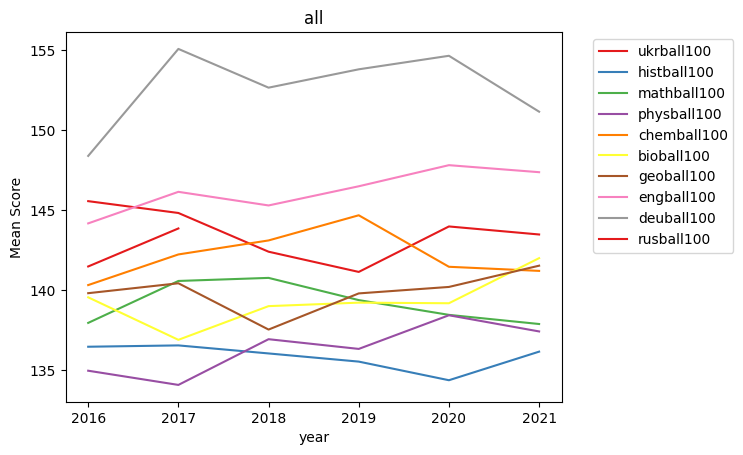

In [19]:
sns.lineplot(data=mean_scores_melted_all, x='year', y='Mean Score', hue='Subject', palette="Set1")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('all')

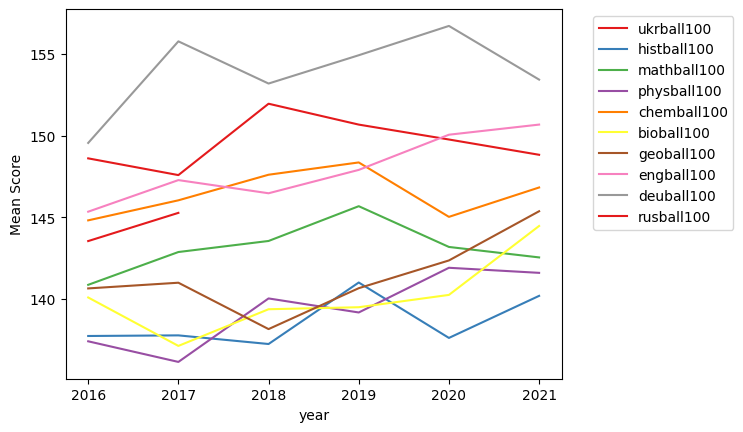

In [20]:
sns.lineplot(data=mean_scores_melted_grad, x='year', y='Mean Score', hue='Subject', palette="Set1")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [21]:
df_melted_all = df_all_pass.melt(id_vars='year', var_name='Subject', value_name='Score')
df_melted_grad = df_grad_pass.melt(id_vars='year', var_name='Subject', value_name='Score')

(array([ 80., 100., 120., 140., 160., 180., 200., 220.]),
 [Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140'),
  Text(160.0, 0, '160'),
  Text(180.0, 0, '180'),
  Text(200.0, 0, '200'),
  Text(220.0, 0, '220')])

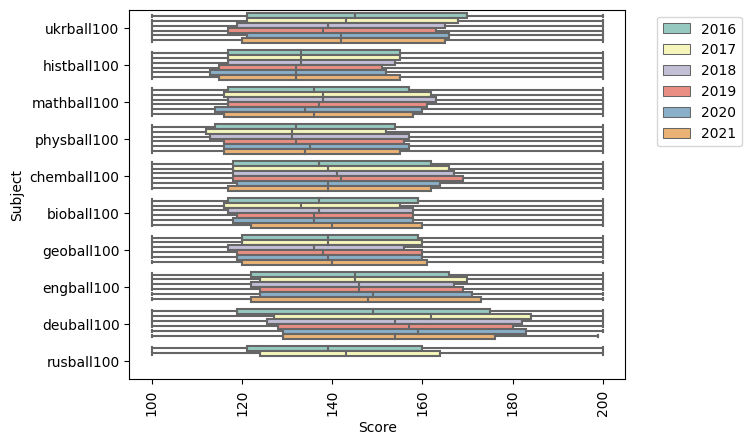

In [22]:
sns.boxplot(data=df_melted_all, x='Score', y='Subject', hue='year', palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)


(array([ 80., 100., 120., 140., 160., 180., 200., 220.]),
 [Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140'),
  Text(160.0, 0, '160'),
  Text(180.0, 0, '180'),
  Text(200.0, 0, '200'),
  Text(220.0, 0, '220')])

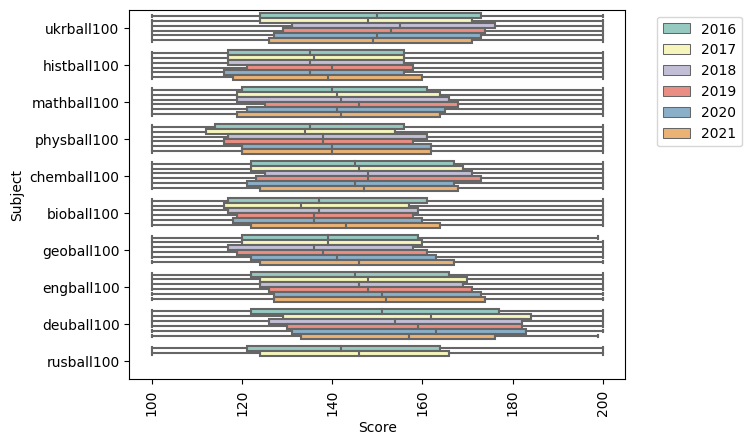

In [23]:
sns.boxplot(data=df_melted_grad, x='Score', y='Subject', hue='year', palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)

In [24]:
data2022 = pd.read_csv('/Users/scipyguru/Downloads/OpenDataNMT2022 (1)/Odata2022File.csv', sep =';')
data2022

,OUTID,Birth,SexTypeName,RegName,AREANAME,TERNAME,RegTypeName,TerTypeName,EONAME,EOTypeName,...,Block1Ball,Block2,Block2Ball100,Block2Ball,Block3,Block3Ball100,Block3Ball,PTRegName,PTAreaName,PTTerName
0,d60381f3-8d71-441e-817e-49b9fa8b43dd,2005,чоловіча,Львівська область,Яворівський район,с.Гусаків,Випускник закладу загальної середньої освіти 2...,"селище, село","Гусаківський навчально-виховний комплекс ""Зага...",навчально-виховний комплекс,...,14.0,Історія України,"147,0",15.0,Математика,"128,0",5.0,Львівська область,"м.Львів, Залізничний район міста",Залізничний район міста
1,eb25a9fc-b757-4321-a2b4-ebb1b635397d,2005,чоловіча,Львівська область,Яворівський район,с.Гусаків,Випускник закладу загальної середньої освіти 2...,"селище, село","Гусаківський навчально-виховний комплекс ""Зага...",навчально-виховний комплекс,...,11.0,Історія України,"149,0",17.0,Математика,"136,0",8.0,Львівська область,"м.Львів, Залізничний район міста",Залізничний район міста
2,1cb161bd-51ed-4d24-b605-1d45db63cada,2005,жіноча,Львівська область,Яворівський район,с.Гусаків,Випускник закладу загальної середньої освіти 2...,"селище, село","Гусаківський навчально-виховний комплекс ""Зага...",навчально-виховний комплекс,...,25.0,Історія України,"158,0",24.0,Математика,"185,0",28.0,Львівська область,"м.Львів, Залізничний район міста",Залізничний район міста
3,0311b8d8-67bb-49a4-a0b9-f049b7ef4184,2005,жіноча,Львівська область,Яворівський район,с.Гусаків,Випускник закладу загальної середньої освіти 2...,"селище, село","Гусаківський навчально-виховний комплекс ""Зага...",навчально-виховний комплекс,...,20.0,Історія України,"146,0",14.0,Математика,"148,0",14.0,Львівська область,"м.Львів, Залізничний район міста",Залізничний район міста
4,a8b35a53-feac-4e42-aed8-8d6ffab7decf,2005,чоловіча,Львівська область,Яворівський район,с.Гусаків,Випускник закладу загальної середньої освіти 2...,"селище, село","Гусаківський навчально-виховний комплекс ""Зага...",навчально-виховний комплекс,...,24.0,Історія України,"144,0",13.0,Математика,"144,0",12.0,Львівська область,"м.Львів, Залізничний район міста",Залізничний район міста
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234099,6cbe3454-80f0-42b5-8d6d-c2ead687d804,2005,чоловіча,Волинська область,Володимирський район,с.Заболотці,Випускник закладу загальної середньої освіти 2...,"селище, село",Заболотцівський ліцей Литовезької сільської ра...,середня загальноосвітня школа,...,13.0,Історія України,"136,0",9.0,Математика,"148,0",14.0,Волинська область,м.Нововолинськ,м.Нововолинськ
234100,b897557b-c01b-49d4-8624-b351aaafe5ff,2005,жіноча,Волинська область,Володимирський район,с.Заболотці,Випускник закладу загальної середньої освіти 2...,"селище, село",Заболотцівський ліцей Литовезької сільської ра...,середня загальноосвітня школа,...,31.0,Історія України,"170,0",29.0,Математика,"162,0",22.0,Волинська область,м.Нововолинськ,м.Нововолинськ
234101,dcec644b-dcec-47ee-9971-6beebd1a929b,2005,чоловіча,Волинська область,Володимирський район,с.Заболотці,Випускник закладу загальної середньої освіти 2...,"селище, село",Заболотцівський ліцей Литовезької сільської ра...,середня загальноосвітня школа,...,21.0,Історія України,"152,0",20.0,Математика,"154,0",19.0,Волинська область,м.Нововолинськ,м.Нововолинськ
234102,cb4156bb-a624-4274-9d38-28be3096f6b9,2004,жіноча,Волинська область,Володимирський район,с.Заболотці,Випускник закладу загальної середньої освіти 2...,"селище, село",Заболотцівський ліцей Литовезької сільської ра...,середня загальноосвітня школа,...,12.0,Історія України,"131,0",7.0,Математика,"131,0",6.0,Волинська область,м.Нововолинськ,м.Нововолинськ


In [25]:
data2022.columns = [col.lower() for col in data2022.columns]

In [26]:
data2022.columns

Index(['outid', 'birth', 'sextypename', 'regname', 'areaname', 'tername',
       'regtypename', 'tertypename', 'eoname', 'eotypename', 'eoregname',
       'eoareaname', 'eotername', 'eoparent', 'test', 'testdate', 'teststatus',
       'block1', 'block1ball100', 'block1ball', 'block2', 'block2ball100',
       'block2ball', 'block3', 'block3ball100', 'block3ball', 'ptregname',
       'ptareaname', 'pttername'],
      dtype='object')

In [27]:
data2022['year'] = 2022

In [93]:
dat_all = data2022[['block1ball100', 'block2ball100', 'block3ball100', 'year']]

In [94]:
data2022.regtypename.unique()

array(['Випускник закладу загальної середньої освіти 2022 року',
       'Студент закладу вищої/фахової передвищої освіти',
       'Випускник минулих років',
       'Учень (слухач) закладу професійної (професійно-технічної) освіти',
       'Установа виконання покарань',
       'Випускник, який здобуде в 2022 році повну загальну середню освіту в закордонному закладі освіти'],
      dtype=object)

In [95]:
datase_grad = data2022[data2022.regtypename == 'Випускник закладу загальної середньої освіти 2022 року']

In [96]:
dat_grad = datase_grad[['block1ball100', 'block2ball100', 'block3ball100', 'year']]

In [97]:
dat_all

,block1ball100,block2ball100,block3ball100,year
0,"142,0","147,0","128,0",2022
1,"137,0","149,0","136,0",2022
2,"169,0","158,0","185,0",2022
3,"154,0","146,0","148,0",2022
4,"166,0","144,0","144,0",2022
...,...,...,...,...
234099,"140,0","136,0","148,0",2022
234100,"184,0","170,0","162,0",2022
234101,"157,0","152,0","154,0",2022
234102,"139,0","131,0","131,0",2022


In [98]:
dat_all = dat_all.astype('str')
dat_all = dat_all.apply(lambda x: x.str.replace(',','.'))
dat_all = dat_all.fillna(-1.0)
dat_all = dat_all.astype('float')
dat_all = dat_all.replace(-1.0, np.nan)
dat_all.year = dat_all.year.astype('int64')

In [99]:
dat_grad = dat_grad.astype('str')
dat_grad = dat_grad.apply(lambda x: x.str.replace(',','.'))
dat_grad = dat_grad.fillna(-1.0)
dat_grad = dat_grad.astype('float')
dat_grad = dat_grad.replace(-1.0, np.nan)
dat_grad.year = dat_grad.year.astype('int64')

In [100]:
dat_all.rename(columns = {'block1ball100':'ukrball100', 'block2ball100':'histball100', 'block3ball100':'mathball100'}, inplace = True)

In [101]:
dat_grad.rename(columns = {'block1ball100':'ukrball100', 'block2ball100':'histball100', 'block3ball100':'mathball100'}, inplace = True)

In [102]:
dat_all

,ukrball100,histball100,mathball100,year
0,142.0,147.0,128.0,2022
1,137.0,149.0,136.0,2022
2,169.0,158.0,185.0,2022
3,154.0,146.0,148.0,2022
4,166.0,144.0,144.0,2022
...,...,...,...,...
234099,140.0,136.0,148.0,2022
234100,184.0,170.0,162.0,2022
234101,157.0,152.0,154.0,2022
234102,139.0,131.0,131.0,2022


In [103]:
dat_all_pass = dat_all.replace(0.0, np.nan)

In [104]:
dat_grad_pass = dat_grad.replace(0.0, np.nan)

In [105]:
dat_grad_pass.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166252 entries, 0 to 234103
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ukrball100   155315 non-null  float64
 1   histball100  155247 non-null  float64
 2   mathball100  155232 non-null  float64
 3   year         166252 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 6.3 MB


In [106]:
dat_grad_pass

,ukrball100,histball100,mathball100,year
0,142.0,147.0,128.0,2022
1,137.0,149.0,136.0,2022
2,169.0,158.0,185.0,2022
3,154.0,146.0,148.0,2022
4,166.0,144.0,144.0,2022
...,...,...,...,...
234099,140.0,136.0,148.0,2022
234100,184.0,170.0,162.0,2022
234101,157.0,152.0,154.0,2022
234102,139.0,131.0,131.0,2022


In [107]:
df_new_all_pass = pd.concat([df_all_pass, dat_all_pass])
df_new_grad_pass = pd.concat([df_grad_pass, dat_grad_pass])

In [108]:
df_new_all = pd.concat([df_all, dat_all])
df_new_grad = pd.concat([df_grad, dat_grad])

In [109]:
failure_count = df_new_all[df_new_all == 0.0].groupby(df_new_all['year']).count()

# Calculate the total count of exams (excluding NaN values) for each subject grouped by year
total_count = df_new_all.notna().groupby(df_new_all['year']).sum()

# Calculate the percentage of failure for each subject grouped by year
failure_percentage = (failure_count / total_count) * 100

failure_percentage = failure_percentage.drop(columns = ['year']).reset_index()

print(failure_percentage)

   year  ukrball100  histball100  mathball100  physball100  chemball100   
0  2016    9.097249    13.484021    14.817915    16.477621    12.408243  \
1  2017    7.460406    14.272850    16.424512    22.599924    19.353807   
2  2018   14.425241    14.170818    18.501875    16.801882    10.478418   
3  2019   15.476984    16.184384    18.111236    14.955847    13.651628   
4  2020    8.207204    13.338409    12.701993     7.651798    10.144144   
5  2021    7.865088    17.976857    31.053390     8.305319    10.694260   
6  2022    0.068668     0.156955     0.125657          NaN          NaN   

   bioball100  geoball100  engball100  deuball100  rusball100  
0   10.222376    5.121631   15.940654   18.164214    6.469003  
1   12.927353    9.058415   15.123425   22.683983   10.587792  
2    8.345747   12.320606   12.655906   17.934272         NaN  
3    8.878246   10.416111   12.664731   20.553562         NaN  
4    5.486542    5.538154    7.299576   11.381653         NaN  
5    2.331352  

In [117]:
failure_percentage_melted_all = failure_percentage.melt(id_vars='year', var_name='Subject', value_name='Percentage of failure, %')
failure_percentage_melted_all

,year,Subject,"Percentage of failure, %"
0,2016,ukrball100,9.097249
1,2017,ukrball100,7.460406
2,2018,ukrball100,14.425241
3,2019,ukrball100,15.476984
4,2020,ukrball100,8.207204
...,...,...,...
65,2018,rusball100,NaN
66,2019,rusball100,NaN
67,2020,rusball100,NaN
68,2021,rusball100,NaN


Text(0.5, 1.0, "Percentage of participants \nwho didn't reached the threshold")

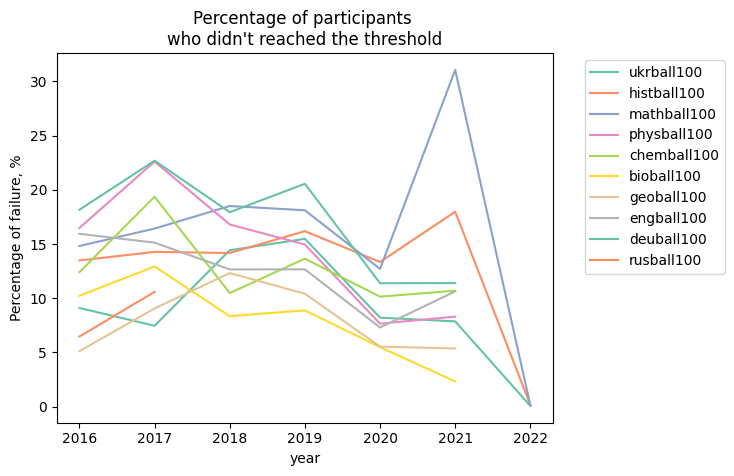

In [118]:
sns.lineplot(data=failure_percentage_melted_all, x='year', y='Percentage of failure, %', hue='Subject', palette="Set2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Percentage of participants \nwho didn't reached the threshold")

In [114]:
failure_count = df_new_grad[df_new_grad == 0.0].groupby(df_new_grad['year']).count()

# Calculate the total count of exams (excluding NaN values) for each subject grouped by year
total_count = df_new_grad.notna().groupby(df_new_grad['year']).sum()

# Calculate the percentage of failure for each subject grouped by year
failure_percentage_grad = (failure_count / total_count) * 100

failure_percentage_grad = failure_percentage_grad.drop(columns = ['year']).reset_index()

print(failure_percentage_grad)

   year  ukrball100  histball100  mathball100  physball100  chemball100   
0  2016    9.706215    14.295608    12.747506    14.349412     9.080693  \
1  2017    7.791204    14.754940    14.094064    19.822802    14.424519   
2  2018    8.290004    14.396233    15.023671    13.741761     7.213569   
3  2019    8.424025     9.251734    11.119984    12.438596    10.029471   
4  2020    5.903542    11.377419     9.195434     6.118547     7.482913   
5  2021    5.616559    14.855581    24.727437     6.432782     7.071742   
6  2022    0.030252     0.074021     0.083676          NaN          NaN   

   bioball100  geoball100  engball100  deuball100  rusball100  
0   10.639541    4.994800   14.032263   15.903837    5.679513  
1   14.006046    9.409001   12.548543   19.716886   11.368804  
2    9.004062   12.344192   10.236618   14.309670         NaN  
3    9.587902   10.353332   10.369436   16.505441         NaN  
4    5.369970    5.092184    5.818546    9.078860         NaN  
5    1.963217  

In [119]:
failure_percentage_melted_grad = failure_percentage_grad.melt(id_vars='year', var_name='Subject', value_name='Percentage of failure, %')
failure_percentage_melted_grad

,year,Subject,"Percentage of failure, %"
0,2016,ukrball100,9.706215
1,2017,ukrball100,7.791204
2,2018,ukrball100,8.290004
3,2019,ukrball100,8.424025
4,2020,ukrball100,5.903542
...,...,...,...
65,2018,rusball100,NaN
66,2019,rusball100,NaN
67,2020,rusball100,NaN
68,2021,rusball100,NaN


Text(0.5, 1.0, "Percentage of graduated participants \nwho didn't reached the threshold")

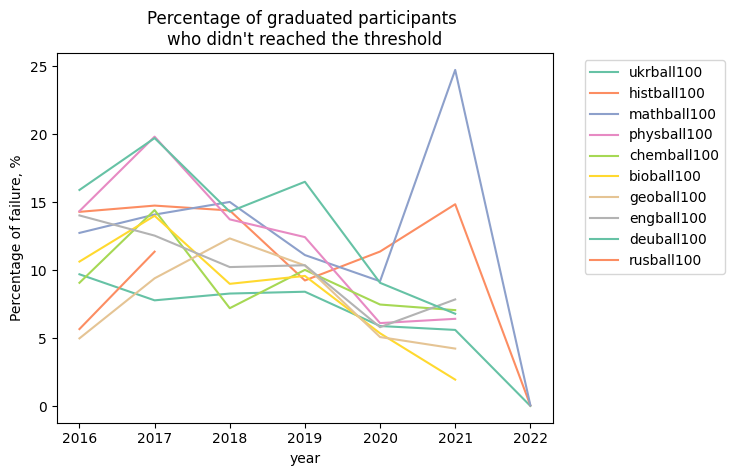

In [120]:
sns.lineplot(data=failure_percentage_melted_grad, x='year', y='Percentage of failure, %', hue='Subject', palette="Set2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Percentage of graduated participants \nwho didn't reached the threshold")

In [44]:
df_new_all_pass

,ukrball100,histball100,mathball100,physball100,chemball100,bioball100,geoball100,engball100,deuball100,rusball100,year
0,112.0,125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
1,133.0,111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
2,149.0,128.0,125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
3,160.0,NaN,143.0,147.0,NaN,NaN,NaN,132.0,NaN,NaN,2016
4,151.0,166.0,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
...,...,...,...,...,...,...,...,...,...,...,...
234099,140.0,136.0,148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
234100,184.0,170.0,162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
234101,157.0,152.0,154.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
234102,139.0,131.0,131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022


In [45]:
mean_scores_all_pass = df_new_all_pass.groupby('year').mean().reset_index()
mean_scores_all_pass

,year,ukrball100,histball100,mathball100,physball100,chemball100,bioball100,geoball100,engball100,deuball100,rusball100
0,2016,145.555300,136.451972,137.943071,134.952317,140.307520,139.541449,139.800279,144.165533,148.383814,141.471182
1,2017,144.815921,136.535293,140.564990,134.064180,142.223324,136.884023,140.420865,146.138012,155.074468,143.847872
2,2018,142.394597,136.032874,140.756863,136.923201,143.098932,138.990833,137.526018,145.286657,152.652174,NaN
3,2019,141.130101,135.522253,139.368297,136.315844,144.672472,139.209189,139.786641,146.485521,153.799355,NaN
4,2020,143.973324,134.357500,138.444566,138.420383,141.451674,139.171235,140.191127,147.805474,154.645367,NaN
5,2021,143.471265,136.145391,137.873160,137.408508,141.194977,141.991385,141.520580,147.366404,151.149660,NaN
6,2022,154.591800,151.341502,148.272678,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
mean_scores_grad_pass = df_new_grad_pass.groupby('year').mean().reset_index()
mean_scores_grad_pass

,year,ukrball100,histball100,mathball100,physball100,chemball100,bioball100,geoball100,engball100,deuball100,rusball100
0,2016,148.605923,137.738353,140.868951,137.413314,144.812901,140.094461,140.648977,145.342734,149.549203,143.546237
1,2017,147.582036,137.776218,142.875634,136.151912,146.039179,137.131592,140.997572,147.276051,155.764484,145.271421
2,2018,151.948341,137.247889,143.551693,140.035819,147.604595,139.375275,138.160264,146.470284,153.183301,NaN
3,2019,150.671393,141.010255,145.679277,139.177052,148.356434,139.498550,140.663032,147.900088,154.914555,NaN
4,2020,149.759795,137.619974,143.185955,141.911560,145.026621,140.252161,142.360229,150.052742,156.708455,NaN
5,2021,148.824738,140.193794,142.545652,141.601396,146.824326,144.469087,145.370540,150.672221,153.423717,NaN
6,2022,157.540617,153.511784,151.145389,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
mean_scores_melted_all_pass = mean_scores_all_pass.melt(id_vars='year', var_name='Subject', value_name='Mean Score')
mean_scores_melted_grad_pass = mean_scores_grad_pass.melt(id_vars='year', var_name='Subject', value_name='Mean Score')

Text(0.5, 1.0, 'Mean score by subject \namong participants who reached the threshold')

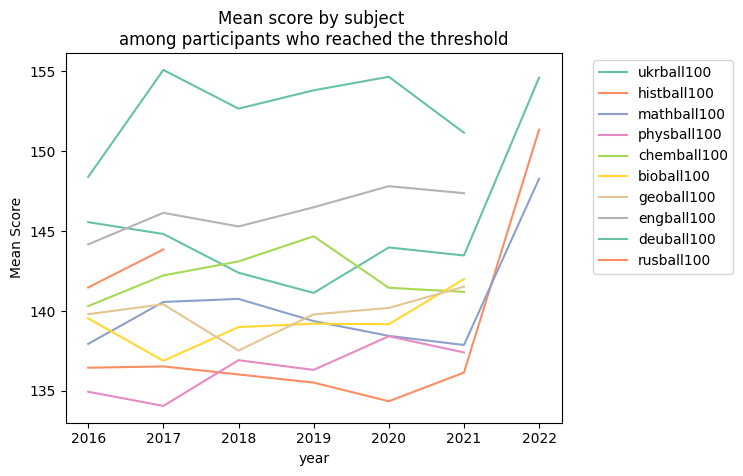

In [48]:
sns.lineplot(data=mean_scores_melted_all_pass, x='year', y='Mean Score', hue='Subject', palette="Set2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Mean score by subject \namong participants who reached the threshold')

(100.0, 200.0)

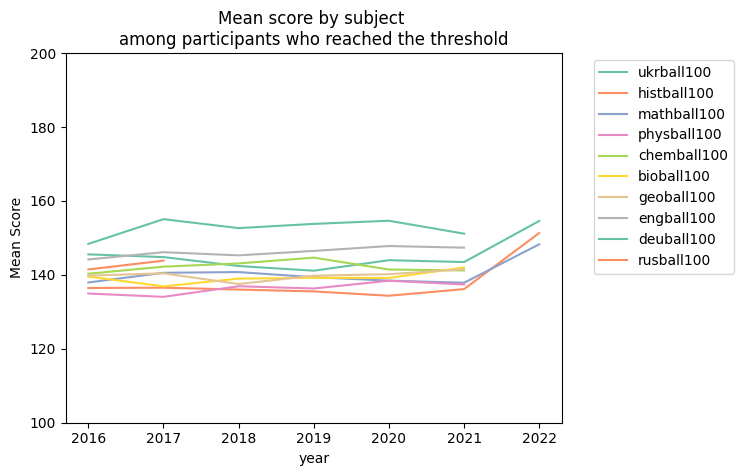

In [49]:
sns.lineplot(data=mean_scores_melted_all_pass, x='year', y='Mean Score', hue='Subject', palette="Set2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Mean score by subject \namong participants who reached the threshold')
plt.ylim(100, 200)

Text(0.5, 1.0, 'Mean score by subject \namong graduated participants who reached the threshold')

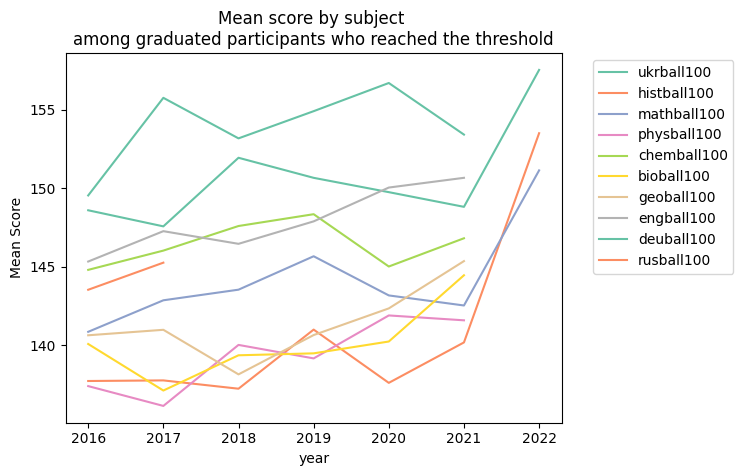

In [50]:
sns.lineplot(data=mean_scores_melted_grad_pass, x='year', y='Mean Score', hue='Subject', palette="Set2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Mean score by subject \namong graduated participants who reached the threshold')

(100.0, 200.0)

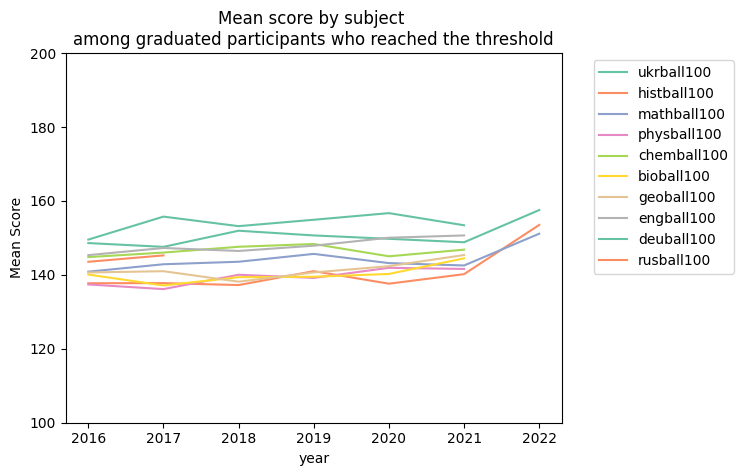

In [51]:
sns.lineplot(data=mean_scores_melted_grad_pass, x='year', y='Mean Score', hue='Subject', palette="Set2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Mean score by subject \namong graduated participants who reached the threshold')
plt.ylim(100, 200)

In [52]:
df_melted_all_pass = df_new_all_pass.melt(id_vars='year', var_name='Subject', value_name='Score')
df_melted_grad_pass = df_new_grad_pass.melt(id_vars='year', var_name='Subject', value_name='Score')

(array([ 80., 100., 120., 140., 160., 180., 200., 220.]),
 [Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140'),
  Text(160.0, 0, '160'),
  Text(180.0, 0, '180'),
  Text(200.0, 0, '200'),
  Text(220.0, 0, '220')])

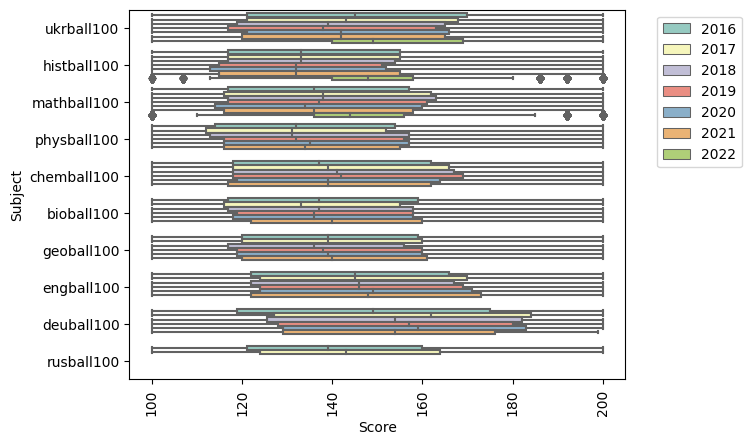

In [53]:
sns.boxplot(data=df_melted_all_pass, x='Score', y='Subject', hue='year', palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)


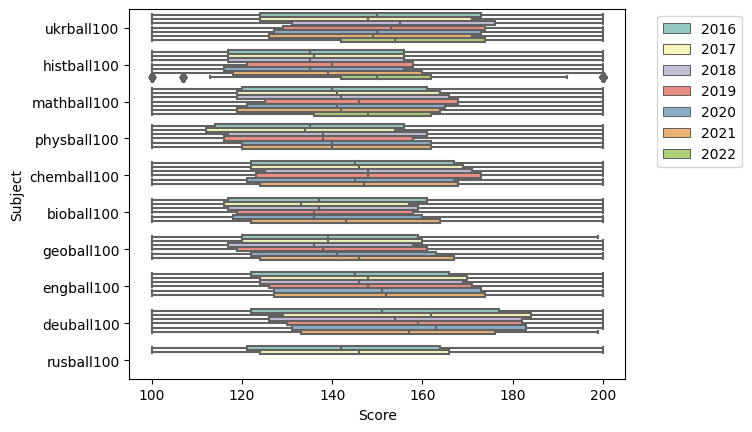

In [54]:
sns.boxplot(data=df_melted_grad_pass, x='Score', y='Subject', hue='year', palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Distribution

In [55]:
data

,outid,sextypename,regname,areaname,tername,regtypename,eoname,eotypename,eoregname,eoareaname,...,schoolname,"Ступінь закладу ( I, I-II, I-III)",Кількість штатних працівників педагогічного персоналу разом,Кількість штатних працівників непедагогічного персоналу разом,Кількість штатних працівників педагогічного персоналу пенсійного віку,Кількість учнів разом,Кількість класів разом,"Разом кількість учнів, та дітей, які здобувають дошкільну освіту","Expenditures for the operation of the institution (general fund), UAH thousand (cash expenditures)","Expenditures for the operation of the institution (general fund), UAH thousand (plan)"
0,a99c6c63-aa70-4aec-ba42-370f7261e857,чоловіча,Запорізька область,Мелітопольський район,с.Терпіння,Випускник української школи поточного року,"Терпіннівський колегіум ""Джерело"" Мелітопольсь...",колегіум,Запорізька область,Мелітопольський район,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,c3136421-569e-422e-ae8f-41c4c931fd70,жіноча,Хмельницька область,Красилівський район,м.Красилів,Випускник української школи поточного року,Красилівська загальноосвітня школа I-III ступе...,середня загальноосвітня школа,Хмельницька область,Красилівський район,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,fbd0e280-4b77-4f34-942d-00bc850c2992,жіноча,Дніпропетровська область,Петропавлівський район,с.Дмитрівка,Випускник минулих років,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30de395e-7a74-452a-8370-6856d240fbfb,чоловіча,Чернівецька область,м.Чернівці,Шевченківський район міста,Випускник української школи поточного року,Чернівецька спеціалізована школа І-ІІІ ступені...,спеціалізована школа,Чернівецька область,м.Чернівці,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,52a40c74-374e-4744-bd6f-938ab7a4a641,чоловіча,Миколаївська область,Врадіївський район,с.Кумарі,Учень коледжу закладу професійної (професійно-...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967009,e62710ee-74fa-4085-b066-f38fc37ceae7,жіноча,Рівненська область,Демидівський район,смт Демидівка,Учень коледжу закладу професійної (професійно-...,Вище професійне училище №25 смт.Демидівка,заклад професійної (професійно-технічної) освіти,Рівненська область,Демидівський район,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1967010,b2e4de44-7ebd-4163-8952-f988a9de1f67,жіноча,Харківська область,Кегичівський район,смт Кегичівка,Учень коледжу закладу професійної (професійно-...,Професійно-технічне училище №60 смт Кегичівка ...,заклад професійної (професійно-технічної) освіти,Харківська область,Кегичівський район,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1967011,e007c190-1fe1-4658-9eb0-f7cf489fc015,жіноча,Одеська область,Одеська область,м.Білгород-Дністровський,Учень коледжу закладу професійної (професійно-...,"ОКУ ""Білгород-Дністровський медичний фаховий к...",заклад фахової передвищої освіти,Одеська область,м.Білгород-Дністровський,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1967012,2668b9f3-ddf9-4062-acd7-fdf6e2ca8cc8,чоловіча,Вінницька область,Гайсинський район,с.Чечелівка,Випускник української школи поточного року,Середня загальноосвіня школа I-III ступенів с....,середня загальноосвітня школа,Вінницька область,Гайсинський район,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
data.columns

Index(['outid', 'sextypename', 'regname', 'areaname', 'tername', 'regtypename',
       'eoname', 'eotypename', 'eoregname', 'eoareaname',
       ...
       'schoolname', 'Ступінь закладу ( I, I-II, I-III)',
       'Кількість штатних працівників педагогічного персоналу  разом',
       'Кількість штатних працівників непедагогічного персоналу  разом',
       'Кількість штатних працівників педагогічного персоналу  пенсійного віку',
       'Кількість учнів разом', 'Кількість класів разом',
       'Разом кількість учнів, та дітей, які здобувають дошкільну освіту',
       'Expenditures for the operation of the institution (general fund), UAH thousand (cash expenditures)',
       'Expenditures for the operation of the institution (general fund), UAH thousand (plan)'],
      dtype='object', length=130)

In [57]:
dataset_all = data[['sextypename', 'ukrteststatus', 'histteststatus', 'mathteststatus', 'physteststatus',
           'chemteststatus', 'bioteststatus', 'geoteststatus', 'engteststatus', 'deuteststatus',  'frateststatus',
               'spateststatus', 'rusteststatus', 'year']]

In [58]:
dataset_grad = datas_grad[['sextypename', 'ukrteststatus', 'histteststatus', 'mathteststatus', 'physteststatus',
           'chemteststatus', 'bioteststatus', 'geoteststatus', 'engteststatus', 'deuteststatus',  'frateststatus',
               'spateststatus', 'rusteststatus','year']]

In [59]:
dataset_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1967014 entries, 0 to 1967013
Data columns (total 14 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   sextypename     object
 1   ukrteststatus   object
 2   histteststatus  object
 3   mathteststatus  object
 4   physteststatus  object
 5   chemteststatus  object
 6   bioteststatus   object
 7   geoteststatus   object
 8   engteststatus   object
 9   deuteststatus   object
 10  frateststatus   object
 11  spateststatus   object
 12  rusteststatus   object
 13  year            int64 
dtypes: int64(1), object(13)
memory usage: 210.1+ MB


In [60]:
dataset_melted_all = dataset_all.melt(id_vars='year', var_name='Subject', value_name='Test')
dataset_melted_grad = dataset_grad.melt(id_vars='year', var_name='Subject', value_name='Test')

In [61]:
dataset_melted_all

,year,Subject,Test
0,2016,sextypename,чоловіча
1,2016,sextypename,жіноча
2,2016,sextypename,жіноча
3,2016,sextypename,чоловіча
4,2016,sextypename,чоловіча
...,...,...,...
25571177,2021,rusteststatus,NaN
25571178,2021,rusteststatus,NaN
25571179,2021,rusteststatus,NaN
25571180,2021,rusteststatus,NaN


In [62]:
dataset_melted_all.pivot_table(index='Subject', columns='year', values='Test', aggfunc='count')

year,2016,2017,2018,2019,2020,2021
Subject,,,,,,
bioteststatus,78071,89281,82319,81276,113893,127202
chemteststatus,28502,24812,21978,15476,14105,12744
deuteststatus,2959,2556,2359,2190,2153,2418
engteststatus,84900,83856,89312,96188,117663,146366
frateststatus,765,815,624,616,493,561
geoteststatus,56255,73587,79713,80312,130937,175427
histteststatus,193304,182221,168929,231857,264014,298972
mathteststatus,132164,113120,112023,160782,186072,291789
physteststatus,31990,26492,23405,23485,28109,32090


In [63]:
dataset_melted_grad.pivot_table(index='Subject', columns='year', values='Test', aggfunc='count')

year,2016,2017,2018,2019,2020,2021
Subject,,,,,,
bioteststatus,57327,69350,63846,63425,65154,69527
chemteststatus,19782,17195,15438,11207,9435,7713
deuteststatus,2345,2038,1831,1703,1636,1816
engteststatus,67362,68308,72104,77880,88495,106262
frateststatus,633,702,511,500,378,441
geoteststatus,43788,61927,68596,68629,84351,105293
histteststatus,147434,147577,138638,131403,145902,164895
mathteststatus,98453,91589,88989,98270,113930,182149
physteststatus,24004,20400,17489,17552,19161,21280


In [64]:
dataset_all_female = dataset_all[dataset_all['sextypename'] == 'Female']

In [65]:
dataset_grad_female = dataset_grad[dataset_all['sextypename'] == 'Female']

/var/folders/cz/wq9d8j_11fx3b8pjjbk7z8br0000gn/T/ipykernel_73915/3066591136.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset_grad_female = dataset_grad[dataset_all['sextypename'] == 'Female']


In [66]:
dataset_melted_all_female = dataset_all_female.melt(id_vars='year', var_name='Subject', value_name='Test')

In [67]:
dataset_melted_grad_female = dataset_grad_female.melt(id_vars='year', var_name='Subject', value_name='Test')

In [68]:
dataset_melted_all_female.pivot_table(index='Subject', columns='year', values='Test', aggfunc='count')

year
Subject


In [69]:
dataset_melted_grad_female.pivot_table(index='Subject', columns='year', values='Test', aggfunc='count')

year
Subject


In [70]:
data2022.sextypename.value_counts()

sextypename
жіноча      122311
чоловіча    111793
Name: count, dtype: int64

In [71]:
datase_grad.sextypename.value_counts()

sextypename
жіноча      90284
чоловіча    75968
Name: count, dtype: int64

In [72]:
df_new1_all = pd.concat([dat_all, df_all])
df_new1_grad = pd.concat([dat_grad, df_grad])

In [73]:
mean_scores_all1 = df_new1_all.groupby('year').mean().reset_index()
mean_scores_grad1 = df_new1_grad.groupby('year').mean().reset_index()

In [74]:
mean_scores_melted_all1 = mean_scores_all1.melt(id_vars='year', var_name='Subject', value_name='Mean Score')
mean_scores_melted_grad1 = mean_scores_grad1.melt(id_vars='year', var_name='Subject', value_name='Mean Score')

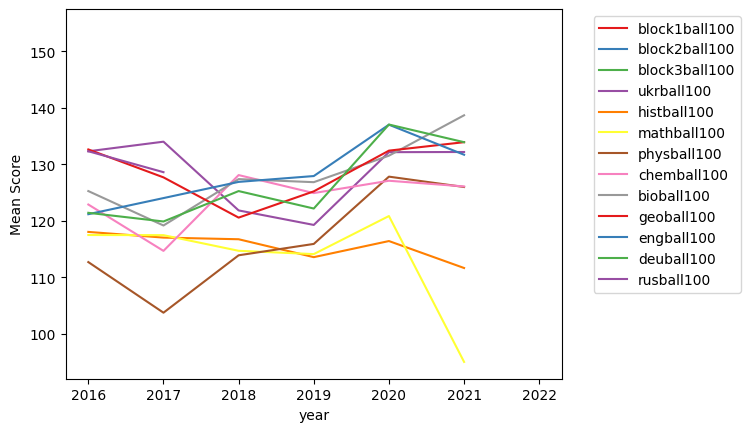

In [75]:
sns.lineplot(data=mean_scores_melted_all1, x='year', y='Mean Score', hue='Subject', palette="Set1")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

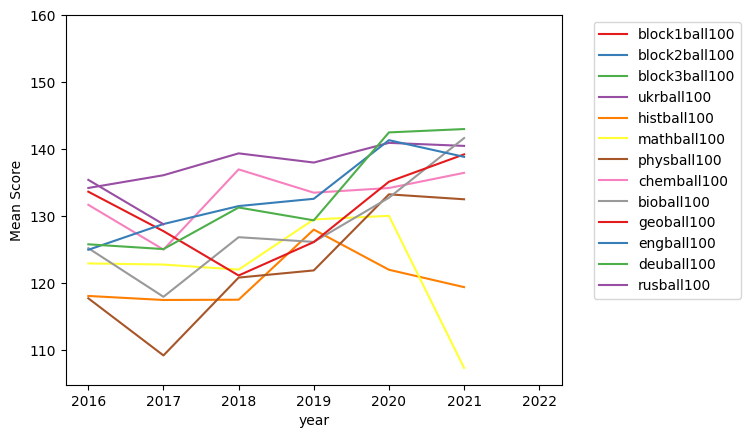

In [76]:
sns.lineplot(data=mean_scores_melted_grad1, x='year', y='Mean Score', hue='Subject', palette="Set1")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')